In [101]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
NUM_QUAL = 2749898
NUM_QUIZ = 1408342
NUM_BINS = 30
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [102]:
# predictions on probe
probe_predictions = [#"data/kevin/probe/out_probe_svd_1.92.dta",
                     #"data/misc/all_mean_probe.dta",
                     "data/frank/SVDPP_prediction_probe4-04.dta",
                     #"data/kevin/probe/out_probe_knn_2.dta",
                     "data/james/probe/SVD_probe5-08.dta",
                     "data/james/probe/Time_SVDpp_probe6-50.dta",
                     "data/james/probe/baseline_probe.dta",
                     "data/james/probe/Time_SVDpp_paper_probe.dta",
                     "data/james/probe/SVDpp_probe5-46.dta",
                     "data/james/probe/FactorNM_probe.dta"
                    ]                                    
# predictions on quiz
qual_predictions = [#"data/kevin/qual/out_qual_svd_1.92.dta",
                    #"data/misc/all_mean_qual.dta",
                    "data/frank/SVDPP_prediction_qual4-04.dta",
                    #"data/kevin/qual/out_qual_knn_2.dta"
                    "data/james/qual/SVD_qual5-08.dta",
                    "data/james/qual/Time_SVDpp_qual6-50.dta",
                    "data/james/qual/baseline_qual.dta",
                    "data/james/qual/Time_SVDpp_paper_qual.dta",
                    "data/james/qual/SVDpp_qual5-46.dta",
                    "data/james/qual/FactorNM_qual.dta"
                    ]
num_models = 0

In [103]:
num_models = 0
if len(probe_predictions) == len(qual_predictions):
    num_models = len(probe_predictions)
    print("GOOD TO GO")
else:
    print("WE HAVE A PROBLEM")

GOOD TO GO


In [104]:
# load predictions on probe
X_train = []
for preds in probe_predictions:
    X_train.append(np.loadtxt(preds).astype(float))
    
# load probe (just the ratings)
probe = np.loadtxt('probe_ratings.dta').astype(int)

In [105]:
# load predictions on quiz
X_test = []
for preds in qual_predictions:
    X_test.append(np.loadtxt(preds).astype(float))

In [106]:
# Transpose the matrices so they have dimension NUM_QUAL/NUM_PROBE x num_models
X_train = np.array(X_train).T
print(X_train.shape)
X_test = np.array(X_test).T
print(X_test.shape)

(1374739, 7)
(2749898, 7)


In [107]:
# load probe (user, movie, time)
probe_time = np.loadtxt('probe.dta', usecols = (2)).astype(int)
# load qual (user, movie, user, time)
qual_time = np.loadtxt('qual.dta', usecols = (2)).astype(int)

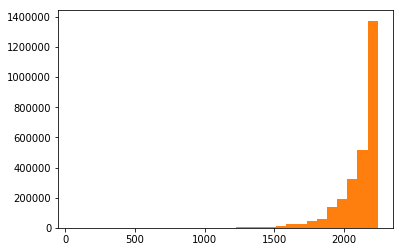

In [108]:
#get the bins 
(n, bins_p, patches) = plt.hist(probe_time, bins=NUM_BINS)
# plt.xlim(left=1000, right = 3000)
# plt.ylabel('Count')

(n, bins_q, patches) = plt.hist(qual_time, bins=NUM_BINS)
# plt.xlim(left=1000, right = 3000)
# plt.ylabel('Count');


In [109]:
def getAlphas (A, probe):
    A = np.array(A)
    probe = np.array(probe)
    
    A_T = np.transpose(A)
    A_TA = np.matmul(A_T, A)
#     regularize(A_TA, REG)
    return np.dot(inv(A_TA), np.dot(A_T, probe))

In [110]:
# probe stuff
probe_bins = [[] for i in range(NUM_BINS + 1)]   # length is number of bins
probe_segs = [[] for i in range(NUM_BINS + 1)]  # length is number of bins

In [111]:
# populate probe_bins and probe_segs
probe_bin_indices = np.digitize(probe_time, bins_p) - 1 # length of probe_ratings
for i in range(len(probe)):
    bin_number = probe_bin_indices[i]
    probe_bins[bin_number].append(X_train[i])
    probe_segs[bin_number].append(probe[i])


In [112]:
alphas = []
for k in range(NUM_BINS + 1):
    alphas.append(getAlphas(probe_bins[k], probe_segs[k]))

In [66]:
# np.dot(X_test[1], alphas[1])

2.9648550986443762

In [113]:
qual_bin_indices = np.digitize(qual_time, bins_q) - 1 # length of qual

ratings = []
for i in range(len(X_test)):
    bin_number = qual_bin_indices[i]
    r = np.dot(X_test[i], alphas[bin_number])
    ratings.append(r)

In [114]:
print(len(ratings))

2749898


In [115]:
ratings = np.clip(ratings, 1, 5)

f = open("output/time_bin_lin_blend.dta", "w+")

for i in range(len(ratings)):
    f.write(str(ratings[i]) + '\n')
f.close()